# Etude de l'impact des ChutOnLit

Est-ce que les personnes inscrites via l'action ChutOnLit reviennent, d'une manière ou d'une autre à la médiathèque ?

On observe en effet dans les pratiques de lectures un décrochage au Collège, et plus particulièrement les classes de 4e qui s'éloignent des bibliothèque. On le constate sur le nombre d'inscriptions en bibliothèque. 

L'action CHOL avait pour objectif de cibler ce public éloigné des pratiques de lecture pour créer une habitude, un point d'accroche pour faire venir les jeunes, mais surtout revenir les jeunes. 

L'objectif de ce notebook et donc de tenter d'analyser l'impact des CHOL sur les pratiques observées/observables à la médiathèque. 

** Comment procéder ? 

Pour notre étude, on peut distinguer 2 types d'adhérents : 
* les adhérents classiques
* les adhérents qui ont été inscrits durant un CHOL

# A FAIRE

* [x] Vérifier que l'attribut AM10 est fiable

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from kiblib.utils import lucas_sns_params

from kiblib.adherent import Adherent

from kiblib.utils.db import DbConn
from kiblib.utils.code2libelle import Code2Libelle


db_conn = DbConn().create_engine()

In [2]:
def get_Pct(df,column):
    df['Part (En %)'] = round((df[column]/df[column].sum())*100,1)

In [3]:
query = """SELECT *
FROM statdb.stat_adherents sa 
WHERE date_extraction = (
	SELECT MAX(date_extraction)
	FROM statdb.stat_adherents sa2
	WHERE YEAR(date_extraction) = '2024' AND MONTH(date_extraction) = '10'
	)"""

In [4]:
adh = pd.read_sql(query,db_conn)

In [5]:
# Sur la base de la date d'extraction
# On définit une période de début (date d'extraction moins 12 mois)
# Et une période de fin qui correspond à la date d'extraction

date_debut = (adh.iloc[0,0] - timedelta(days=365)).strftime('%d %b %Y')
date_fin = adh.iloc[0,0].strftime('%d %b %Y')

# Filtrer inscrits < 1 an ?

In [6]:
#adh = adh[adh['inscription_fidelite']==0]

In [7]:
adh['nb_adherents'] = 1

adh.loc[adh['age'].between(14,16),["Tranche d'âge"]] = 'les 14-16 ans' 
adh.loc[adh['inscription_fidelite']==0,["inscrit_depuis"]] = "a/ Moins d'1 an"
adh.loc[adh['inscription_fidelite']>0,["inscrit_depuis"]] = "b/ Plus d'1 an"
adh.loc[adh['nb_venues_prets_mediatheque']>3,['nb_venues_prets_mediatheque']] = 'Plus de 3 fois'

In [8]:
adh_repartition = adh.pivot_table(index='nb_venues_prets_mediatheque',
                   values='nb_adherents',
                   aggfunc=sum)

In [9]:
adh_chol = adh[adh['inscription_attribut']=="AM10"]

In [10]:
adh_chol_repartition_prets_med= adh_chol.pivot_table(index=['nb_venues_prets_mediatheque'],
                                                     values='nb_adherents',
                                                     aggfunc=sum
                                                    )

In [11]:
adh_chol_repartition_prets_med_by_anciennete = adh_chol.pivot_table(index=['inscrit_depuis','nb_venues_prets_mediatheque'],
                                                     values='nb_adherents',
                                                     aggfunc=sum
                                                    )

In [12]:
adh_chol_repartition_prets_med_by_anciennete = adh_chol_repartition_prets_med_by_anciennete.reset_index()

In [13]:
adh_4e = adh[(adh["Tranche d'âge"]=="les 14-16 ans")&
             (adh["geo_ville"]=='ROUBAIX')
            ]

In [14]:
adh_4e_repartition = adh_4e.pivot_table(index='nb_venues_prets_mediatheque',
                   values='nb_adherents',
                   aggfunc=sum
                  )

In [15]:
get_Pct(df=adh_repartition,column='nb_adherents')
get_Pct(df=adh_chol_repartition_prets_med,column='nb_adherents')
get_Pct(df=adh_4e_repartition,column='nb_adherents')

# NOUVEAUX INSCRITS
## Les participants du ChutOnLit

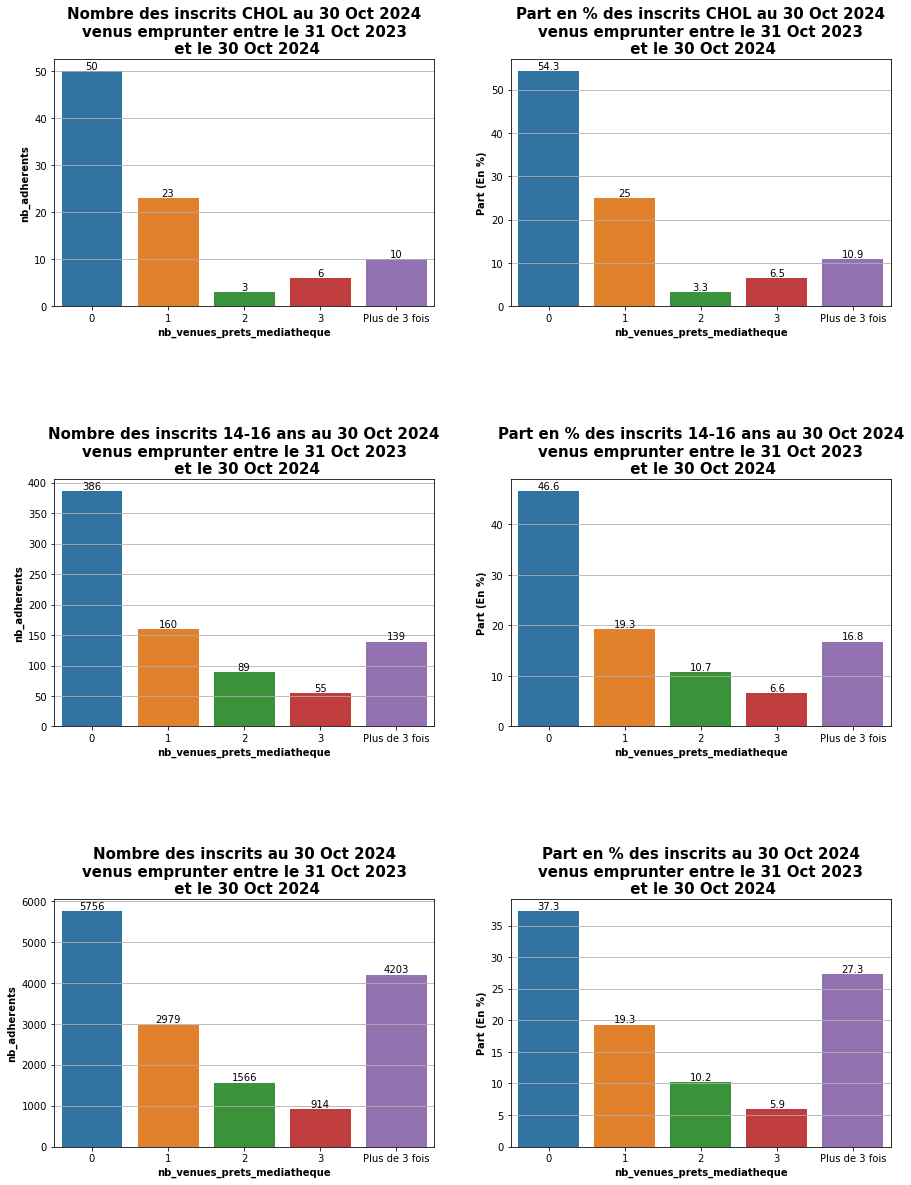

In [16]:
f,axs = plt.subplots(nrows=3,ncols=2,figsize=(15,20))

sns.barplot(data=adh_chol_repartition_prets_med,
                 x=adh_chol_repartition_prets_med.index,
                 y='nb_adherents',ax=axs[0,0])

axs[0,0].set_title(f"Nombre des inscrits CHOL au {date_fin}\nvenus emprunter entre le {date_debut}\n et le {date_fin}")

for i in axs[0,0].containers:
    axs[0,0].bar_label(i,)

sns.barplot(data=adh_chol_repartition_prets_med,
                 x=adh_chol_repartition_prets_med.index,
                 y='Part (En %)',ax=axs[0,1])

axs[0,1].set_title(f"Part en % des inscrits CHOL au {date_fin}\nvenus emprunter entre le {date_debut}\n et le {date_fin}")


for i in axs[0,1].containers:
    axs[0,1].bar_label(i,)
    

    
sns.barplot(data=adh_4e_repartition,
                 x=adh_4e_repartition.index,
                 y='nb_adherents',ax=axs[1,0])

axs[1,0].set_title(f"Nombre des inscrits 14-16 ans au {date_fin}\nvenus emprunter entre le {date_debut}\n et le {date_fin}")

for i in axs[1,0].containers:
    axs[1,0].bar_label(i,)

sns.barplot(data=adh_4e_repartition,
                 x=adh_4e_repartition.index,
                 y='Part (En %)',ax=axs[1,1])

axs[1,1].set_title(f"Part en % des inscrits 14-16 ans au {date_fin}\nvenus emprunter entre le {date_debut}\n et le {date_fin}")


for i in axs[1,1].containers:
    axs[1,1].bar_label(i,)
    
    
    
sns.barplot(data=adh_repartition,
                 x=adh_repartition.index,
                 y='nb_adherents',ax=axs[2,0])

axs[2,0].set_title(f"Nombre des inscrits au {date_fin}\nvenus emprunter entre le {date_debut}\n et le {date_fin}")

for i in axs[2,0].containers:
    axs[2,0].bar_label(i,)

sns.barplot(data=adh_repartition,
                 x=adh_repartition.index,
                 y='Part (En %)',ax=axs[2,1])

axs[2,1].set_title(f"Part en % des inscrits au {date_fin}\nvenus emprunter entre le {date_debut}\n et le {date_fin}")


for i in axs[2,1].containers:
    axs[2,1].bar_label(i,)

# VENUS TOUT COURT

In [17]:
adh = pd.read_sql(query,db_conn)

# Sur la base de la date d'extraction
# On définit une période de début (date d'extraction moins 12 mois)
# Et une période de fin qui correspond à la date d'extraction

date_debut = (adh.iloc[0,0] - timedelta(days=365)).strftime('%d %b %Y')
date_fin = adh.iloc[0,0].strftime('%d %b %Y')

# FILTRER INSCRIPTION FIDELITE

adh = adh[adh['inscription_fidelite']==0]

adh['nb_adherents'] = 1

adh.loc[adh['age'].between(14,16),["Tranche d'âge"]] = 'les 14-16 ans' 
adh.loc[adh['inscription_fidelite']==0,["inscrit_depuis"]] = "a/ Moins d'1 an"
adh.loc[adh['inscription_fidelite']>0,["inscrit_depuis"]] = "b/ Plus d'1 an"
adh.loc[adh['nb_venues']>3,['nb_venues']] = 'Plus de 3 fois'

adh_repartition = adh.pivot_table(index='nb_venues',
                   values='nb_adherents',
                   aggfunc=sum)

adh_chol = adh[adh['inscription_attribut']=="AM10"]

adh_chol_repartition_prets_med= adh_chol.pivot_table(index=['nb_venues'],
                                                     values='nb_adherents',
                                                     aggfunc=sum
                                                    )

adh_chol_repartition_prets_med_by_anciennete = adh_chol.pivot_table(index=['inscrit_depuis','nb_venues'],
                                                     values='nb_adherents',
                                                     aggfunc=sum
                                                    )

adh_chol_repartition_prets_med_by_anciennete = adh_chol_repartition_prets_med_by_anciennete.reset_index()

adh_4e = adh[(adh["Tranche d'âge"]=="les 14-16 ans")&
             (adh["geo_ville"]=='ROUBAIX')
            ]

adh_4e_repartition = adh_4e.pivot_table(index='nb_venues',
                   values='nb_adherents',
                   aggfunc=sum
                  )

get_Pct(df=adh_repartition,column='nb_adherents')
get_Pct(df=adh_chol_repartition_prets_med,column='nb_adherents')
get_Pct(df=adh_4e_repartition,column='nb_adherents')

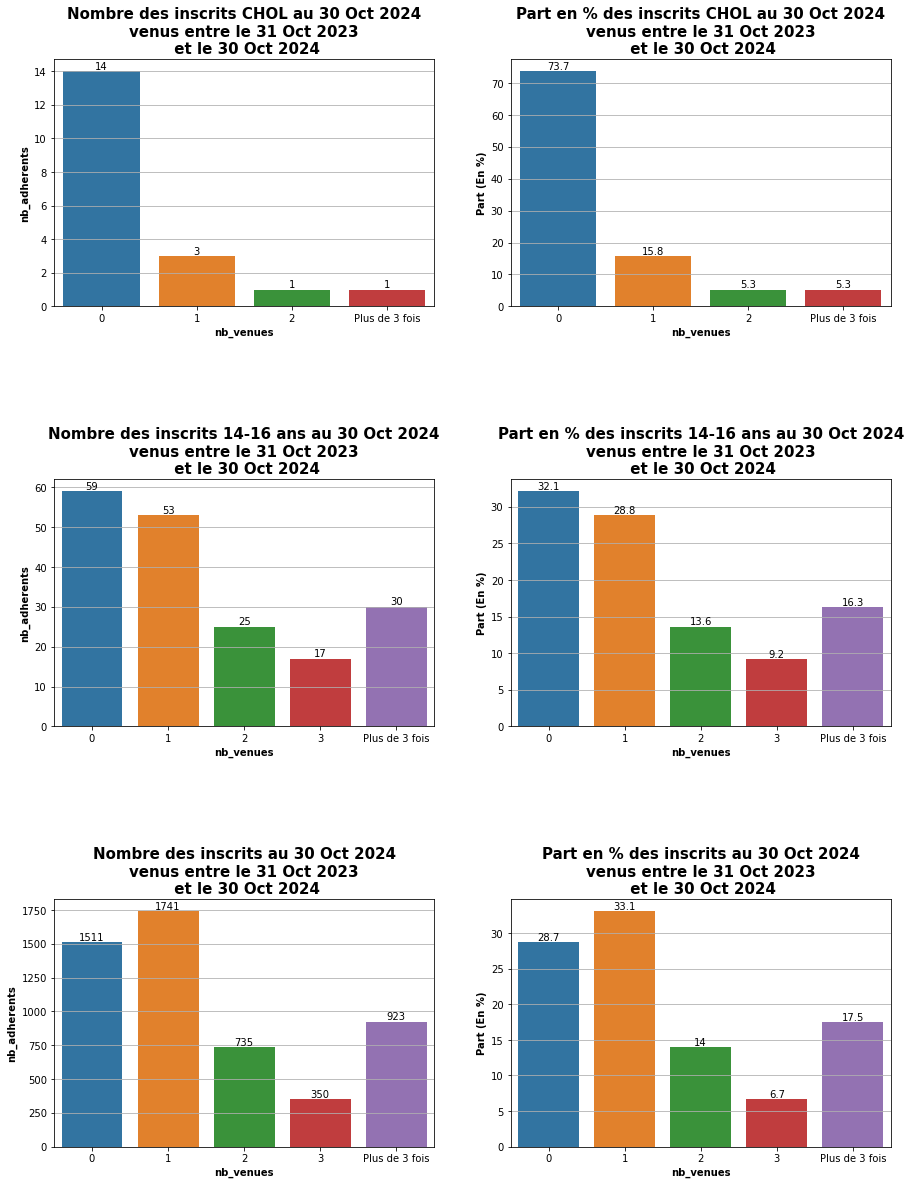

In [18]:
f,axs = plt.subplots(nrows=3,ncols=2,figsize=(15,20))

sns.barplot(data=adh_chol_repartition_prets_med,
                 x=adh_chol_repartition_prets_med.index,
                 y='nb_adherents',ax=axs[0,0])

axs[0,0].set_title(f"Nombre des inscrits CHOL au {date_fin}\nvenus entre le {date_debut}\n et le {date_fin}")

for i in axs[0,0].containers:
    axs[0,0].bar_label(i,)

sns.barplot(data=adh_chol_repartition_prets_med,
                 x=adh_chol_repartition_prets_med.index,
                 y='Part (En %)',ax=axs[0,1])

axs[0,1].set_title(f"Part en % des inscrits CHOL au {date_fin}\nvenus entre le {date_debut}\n et le {date_fin}")


for i in axs[0,1].containers:
    axs[0,1].bar_label(i,)
    

    
sns.barplot(data=adh_4e_repartition,
                 x=adh_4e_repartition.index,
                 y='nb_adherents',ax=axs[1,0])

axs[1,0].set_title(f"Nombre des inscrits 14-16 ans au {date_fin}\nvenus entre le {date_debut}\n et le {date_fin}")

for i in axs[1,0].containers:
    axs[1,0].bar_label(i,)

sns.barplot(data=adh_4e_repartition,
                 x=adh_4e_repartition.index,
                 y='Part (En %)',ax=axs[1,1])

axs[1,1].set_title(f"Part en % des inscrits 14-16 ans au {date_fin}\nvenus entre le {date_debut}\n et le {date_fin}")


for i in axs[1,1].containers:
    axs[1,1].bar_label(i,)
    
    
    
sns.barplot(data=adh_repartition,
                 x=adh_repartition.index,
                 y='nb_adherents',ax=axs[2,0])

axs[2,0].set_title(f"Nombre des inscrits au {date_fin}\nvenus entre le {date_debut}\n et le {date_fin}")

for i in axs[2,0].containers:
    axs[2,0].bar_label(i,)

sns.barplot(data=adh_repartition,
                 x=adh_repartition.index,
                 y='Part (En %)',ax=axs[2,1])

axs[2,1].set_title(f"Part en % des inscrits au {date_fin}\nvenus entre le {date_debut}\n et le {date_fin}")


for i in axs[2,1].containers:
    axs[2,1].bar_label(i,)